# 기말고사 예상문제
> 빅데이터분석특강

> 기말고사 예상문제
- toc:false
- branch: master
- badges: true
- comments: true
- author: 심재인

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

In [5]:
#!conda install -c conda-forge python-graphviz -y

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

- 평가지표로 accuracy를 이용할 것
- epoch은 10으로 설정할 것
- optimizer는 adam을 이용할 것

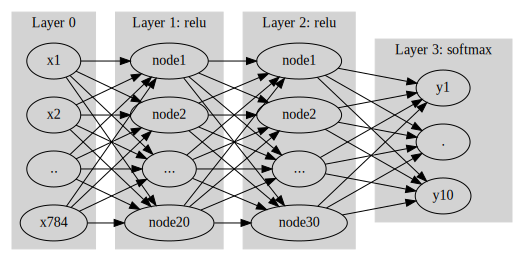

In [6]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

2022-06-08 16:13:07.876631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [9]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5897 - accuracy: 0.5085
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9539 - accuracy: 0.6102
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9042 - accuracy: 0.6211
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9006 - accuracy: 0.6244
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8781 - accuracy: 0.6280
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8677 - accuracy: 0.6324
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8632 - accuracy: 0.6315
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8590 - accuracy: 0.6358
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8455 - accuracy: 0.6361
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.845

`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라.

In [10]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.8329 - accuracy: 0.6417


[0.8329300880432129, 0.641700029373169]

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가?

In [11]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [12]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 3.7604 - accuracy: 0.2533 - val_loss: 1.8268 - val_accuracy: 0.3212
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 1.7592 - accuracy: 0.3275 - val_loss: 1.6927 - val_accuracy: 0.3509
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 1.6008 - accuracy: 0.3767 - val_loss: 1.5118 - val_accuracy: 0.4139
Epoch 4/50
240/240 [==============================] - 0s 2ms/step - loss: 1.4380 - accuracy: 0.4215 - val_loss: 1.3867 - val_accuracy: 0.4374
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 1.3066 - accuracy: 0.4505 - val_loss: 1.2980 - val_accuracy: 0.4444
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1.2581 - accuracy: 0.4582 - val_loss: 1.2748 - val_accuracy: 0.4487
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2330 - accuracy: 0.4642 - val_loss: 1.2586 - val_accuracy: 0.4619
Epoch 

In [13]:
%tensorboard --logdir logs --host 0.0.0.0 

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라.

In [14]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.7847


[0.619316041469574, 0.7846999764442444]

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [15]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [16]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 3.7604 - accuracy: 0.2533 - val_loss: 1.8268 - val_accuracy: 0.3212
Epoch 2/50
240/240 [==============================] - 1s 2ms/step - loss: 1.7592 - accuracy: 0.3275 - val_loss: 1.6927 - val_accuracy: 0.3509
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 1.6008 - accuracy: 0.3767 - val_loss: 1.5118 - val_accuracy: 0.4139
Epoch 4/50
240/240 [==============================] - 0s 2ms/step - loss: 1.4380 - accuracy: 0.4215 - val_loss: 1.3867 - val_accuracy: 0.4374
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 1.3066 - accuracy: 0.4505 - val_loss: 1.2980 - val_accuracy: 0.4444
Epoch 6/50
240/240 [==============================] - 0s 2ms/step - loss: 1.2581 - accuracy: 0.4582 - val_loss: 1.2748 - val_accuracy: 0.4487
Epoch 7/50
240/240 [==============================] - 0s 2ms/step - loss: 1.2330 - accuracy: 0.4642 - val_loss: 1.2586 - val_accuracy: 0.4619
Epoch 

In [17]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 1232371), started 0:00:24 ago. (Use '!kill 1232371' to kill it.)

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [18]:
tf.random.set_seed(4305)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Conv2D(6,(4,4),activation='relu'))
net1.add(tf.keras.layers.MaxPool2D()) 
net1.add(tf.keras.layers.Conv2D(16,(4,4),activation='relu'))
net1.add(tf.keras.layers.MaxPool2D()) 
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(120,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.add(tf.keras.layers.Dropout(0.2))
net1.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net1.fit(X,y,epochs=5,batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 3ms/step - loss: 4.7347 - accuracy: 0.5660
Epoch 2/5
300/300 [==============================] - 1s 3ms/step - loss: 3.5849 - accuracy: 0.6637
Epoch 3/5
300/300 [==============================] - 1s 2ms/step - loss: 3.5194 - accuracy: 0.6816
Epoch 4/5
300/300 [==============================] - 0s 2ms/step - loss: 3.4999 - accuracy: 0.6911
Epoch 5/5
300/300 [==============================] - 1s 2ms/step - loss: 3.4962 - accuracy: 0.6991


In [19]:
net1.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8368


[0.4589823782444, 0.8367999792098999]

In [20]:
net1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 6)         102       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          1552      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [21]:
c1, m1, c2, m2, flttn, dns1, dns2, dropout = net1.layers

In [22]:
print(X.shape)
print(c1(X).shape) 
print(m1(c1(X)).shape)
print(c2(m1(c1(X))).shape)
print(m2(c2(m1(c1(X)))).shape)
print(flttn(m2(c2(m1(c1(X))))).shape)
print(dns1(flttn(m2(c2(m1(c1(X)))))).shape)
print(dns2(dns1(flttn(m2(c2(m1(c1(X))))))).shape)
print(dropout(dns2(dns1(flttn(m2(c2(m1(c1(X)))))))).shape)

(60000, 28, 28, 1)
(60000, 25, 25, 6)
(60000, 12, 12, 6)
(60000, 9, 9, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 10)
(60000, 10)


`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라.
- epoc은 3회로 한정한다.
- validation_split은 0.2로 설정한다.

In [23]:
from tensorboard.plugins.hparams import api as hp

In [24]:
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hpguebin_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            tf.random.set_seed(4305)
            net1 = tf.keras.Sequential()
            net1.add(tf.keras.layers.Conv2D(6,(4,4),activation='relu'))
            net1.add(tf.keras.layers.MaxPool2D()) 
            net1.add(tf.keras.layers.Conv2D(16,(4,4),activation='relu'))
            net1.add(tf.keras.layers.MaxPool2D()) 
            net1.add(tf.keras.layers.Flatten())
            net1.add(tf.keras.layers.Dense(120,activation='relu'))
            net1.add(tf.keras.layers.Dense(10,activation='softmax'))
            net1.add(tf.keras.layers.Dropout(0.2))
            net1.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net1.fit(X,y,epochs=3,batch_size=200,callbacks=cb3,validation_split=0.2)
            _rslt=net.evaluate(XX,yy) 
            tf.summary.scalar('test set loss', _rslt[0], step=1)

Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5250 - accuracy: 0.5634 - val_loss: 0.6955 - val_accuracy: 0.7667
Epoch 2/3
240/240 [==============================] - 1s 2ms/step - loss: 3.6051 - accuracy: 0.6612 - val_loss: 0.5827 - val_accuracy: 0.7985
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.7129 - accuracy: 0.7543
Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5248 - accuracy: 0.5633 - val_loss: 0.6992 - val_accuracy: 0.7633
Epoch 2/3
240/240 [==============================] - 0s 2ms/step - loss: 3.6034 - accuracy: 0.6613 - val_loss: 0.5811 - val_accuracy: 0.7993
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.7129 - accuracy: 0.7543
Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5262 - accuracy: 0.5644 - val_loss: 0.6997 - val_accuracy: 0.7646
Epoch 2/3
240/240 [==============================] - 0s 2ms/step - loss: 3.6059 - accuracy: 0.661

In [25]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 1232371), started 0:00:53 ago. (Use '!kill 1232371' to kill it.)

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라.

- 결과를 텐서보드로 시각화할 필요는 없다.
- 자유롭게 모형을 설계하여 적합하라.
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다.

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
X = tf.constant(x_train.reshape(-1,32,32,3),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,32,32,3),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [29]:
print(X.shape)
print(y.shape)
print(XX.shape)
print(yy.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [88]:
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Dropout(0.5))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Dropout(0.5))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [89]:
net2.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 45s 35ms/step - loss: 2.6127 - accuracy: 0.4010 - val_loss: 1.5840 - val_accuracy: 0.4920
Epoch 2/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.2954 - accuracy: 0.5390 - val_loss: 1.3591 - val_accuracy: 0.5917
Epoch 3/5
1250/1250 [==============================] - 44s 36ms/step - loss: 1.1407 - accuracy: 0.6010 - val_loss: 1.3277 - val_accuracy: 0.6088
Epoch 4/5
1250/1250 [==============================] - 44s 36ms/step - loss: 1.0323 - accuracy: 0.6411 - val_loss: 1.1921 - val_accuracy: 0.6146
Epoch 5/5
1250/1250 [==============================] - 44s 36ms/step - loss: 0.9681 - accuracy: 0.6638 - val_loss: 1.0791 - val_accuracy: 0.6699


In [90]:
net2.fit(X,y,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.9193 - accuracy: 0.6816 - val_loss: 0.9488 - val_accuracy: 0.6888
Epoch 2/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8832 - accuracy: 0.6917 - val_loss: 0.9723 - val_accuracy: 0.6720
Epoch 3/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8619 - accuracy: 0.7007 - val_loss: 0.9541 - val_accuracy: 0.6826
Epoch 4/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8298 - accuracy: 0.7099 - val_loss: 0.9886 - val_accuracy: 0.6672
Epoch 5/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8157 - accuracy: 0.7166 - val_loss: 0.8862 - val_accuracy: 0.6994
Epoch 6/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8035 - accuracy: 0.7189 - val_loss: 0.8708 - val_accuracy: 0.7042
Epoch 7/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.7866 - accuracy: 0.7262 - val_loss: 0.8843 -

In [91]:
net2.evaluate(XX,yy)

313/313 [==============================] - 4s 12ms/step - loss: 0.8499 - accuracy: 0.7096


[0.8499225378036499, 0.7095999717712402]

## 4. 다음을 읽고 물음에 답하라. (10점)

(1) (1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

In [ ]:
tf.random.set_seed(43052)
cnv = tf.keras.layers.Conv2D(5,(2,2))
XXX = tnp.array([1]*1*128*128*3,dtype=tf.float64).reshape(1,128,128,3)

In [ ]:
cnv(XXX)

답 : (1, 127, 127, 5)

(2) (1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은?

In [92]:
24*24*16

9216

답 :

(3)

(4)

(5)